In [1]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
credit_df = pd.read_csv('German Credit Dataset.csv')

In [6]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
credit_df.shape

(1000, 17)

In [4]:
credit_df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [5]:
credit_df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [74]:
for feature in credit_df.columns:
    if credit_df[feature].dtype=='object':
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes

In [75]:
pd.Categorical(credit_df['checking_balance']).codes

array([1, 0, 3, 1, 1, 3, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 3, 1, 0, 3, 3, 1,
       1, 0, 3, 1, 3, 2, 0, 1, 0, 1, 0, 3, 2, 0, 3, 2, 2, 0, 3, 0, 0, 1,
       1, 3, 3, 1, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 2, 1, 0, 0, 0, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 1, 0, 1, 1, 1, 0, 3, 0, 3, 3, 3, 1, 1, 3, 0, 0,
       1, 1, 3, 1, 3, 2, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0,
       0, 2, 0, 3, 1, 3, 1, 1, 1, 0, 1, 3, 3, 2, 0, 1, 1, 0, 0, 1, 0, 1,
       3, 3, 3, 3, 3, 0, 0, 2, 2, 0, 1, 1, 3, 0, 1, 3, 1, 3, 3, 3, 2, 0,
       0, 1, 1, 1, 0, 3, 3, 3, 3, 0, 3, 3, 1, 0, 3, 0, 1, 3, 0, 0, 1, 3,
       1, 1, 3, 1, 3, 0, 1, 3, 0, 3, 0, 0, 1, 0, 3, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 3, 1, 3, 1, 3, 1, 3, 0, 1, 3, 3, 3, 1, 2, 3, 0, 1, 2, 1, 3,
       0, 1, 3, 3, 3, 3, 0, 1, 3, 1, 2, 3, 3, 0, 3, 1, 0, 0, 3, 1, 1, 3,
       1, 3, 3, 3, 3, 3, 2, 3, 1, 2, 0, 3, 0, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       3, 0, 3, 3, 1, 3, 3, 3, 0, 0, 1, 3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 1,
       1, 0, 0, 1, 3, 0, 1, 2, 3, 0, 3, 3, 3, 0, 3,

In [15]:
credit_df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [17]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

In [18]:
x = credit_df.drop('default' , axis= 1)
y = credit_df.pop('default')

In [19]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size= .3, random_state=1)

In [169]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [170]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [171]:
X_train

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
731,1,24,1,4,1987,2,0,2,4,21,1,2,1,3,2,0
716,3,30,0,4,3077,4,3,3,2,40,1,1,2,1,2,1
640,1,18,1,3,750,2,4,4,1,27,1,1,1,2,1,0
804,0,12,1,1,7472,4,4,1,2,24,1,2,1,2,1,0
737,1,18,1,1,4380,0,0,3,4,35,1,1,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,3,10,1,1,2901,4,2,1,4,31,1,2,1,1,1,0
72,1,8,0,2,1164,2,3,3,4,51,0,0,2,0,2,1
908,3,15,3,1,3594,2,2,1,2,46,1,1,2,3,1,0
235,1,24,1,4,1823,2,4,4,2,30,2,1,1,0,2,0


In [172]:

train_labels

731    1
716    0
640    1
804    0
737    0
      ..
767    0
72     0
908    0
235    1
37     1
Name: default, Length: 700, dtype: int8

In [108]:
from sklearn import tree

In [109]:
train_char_label = ['No', 'Yes']

In [110]:
Credit_Tree_File = open('C:\\Users\\guptap6\\OneDrive - Automatic Data Processing Inc\\Desktop\\credit_tree.dot','w')
# 'C:\\Users\\guptap6\\OneDrive - Automatic Data Processing Inc\\Documents\\jupyter_GL\\Practice\\DataMining\\Week2DataMiningcredit_tree.docx','w')

In [111]:
dot_data = tree.export_graphviz(dt_model, out_file= Credit_Tree_File, feature_names= list(X_train), class_names=train_char_label)

In [112]:
Credit_Tree_File.close()

In [113]:
reg_dt_model = DecisionTreeClassifier(criterion= 'gini' , max_depth= 7, min_samples_leaf=10, min_samples_split=30)

In [114]:
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [115]:
credit_tree_regularized = open('C:\\Users\\guptap6\\OneDrive - Automatic Data Processing Inc\\Desktop\\credit_tree_regularized.dot','w')

In [116]:
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized, feature_names= list(X_train),class_names= train_char_label)
credit_tree_regularized.close()

In [117]:
reg_dt_model.feature_importances_

array([0.38114073, 0.15512676, 0.06560938, 0.03787535, 0.15720905,
       0.04795162, 0.        , 0.        , 0.0145304 , 0.05591355,
       0.0298396 , 0.0113516 , 0.01352943, 0.02992252, 0.        ,
       0.        ])

In [118]:
print(pd.DataFrame(dt_model.feature_importances_, columns= ['Imp'], index= X_train.columns))

                           Imp
checking_balance      0.146305
months_loan_duration  0.105668
credit_history        0.064208
purpose               0.035918
amount                0.205381
savings_balance       0.043875
employment_duration   0.033438
percent_of_income     0.047494
years_at_residence    0.068023
age                   0.109823
other_credit          0.025183
housing               0.024380
existing_loans_count  0.027653
job                   0.045808
dependents            0.008466
phone                 0.008377


In [119]:
ytrain_predict1 = reg_dt_model.predict(X_train)
ytest_predict1 = reg_dt_model.predict(X_test)

In [120]:
ytrain_predict2 = reg_dt_model.predict_proba(X_train)
ytest_predict2 = reg_dt_model.predict_proba(X_test)

In [121]:
ytrain_predict1.size

970

In [122]:
ytest_predict1

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1], dtype=int8)

In [123]:
ytrain_predict2

array([[0.54545455, 0.45454545],
       [0.9375    , 0.0625    ],
       [0.375     , 0.625     ],
       ...,
       [0.85      , 0.15      ],
       [0.11764706, 0.88235294],
       [0.625     , 0.375     ]])

In [124]:
import matplotlib.pyplot as plt

In [132]:
probs = reg_dt_model.predict_proba(X_train)

In [133]:
probs = probs[ : ,1]

In [135]:
probs.size

970

In [136]:
from sklearn.metrics import roc_auc_score

In [137]:
auc_dev = roc_auc_score(train_labels,probs)

In [129]:
auc_dev

0.854987322515213

In [145]:
probs_test = reg_dt_model.predict_proba(X_test)

In [146]:
probs_test = probs_test[ : ,1]

In [147]:
probs_test.size

30

In [148]:
auc_test = roc_auc_score(test_labels, probs)

ValueError: Found input variables with inconsistent numbers of samples: [30, 970]

In [149]:
from sklearn.metrics import roc_curve

In [150]:
fpr, tpr , thresholds = roc_curve(train_labels,probs)

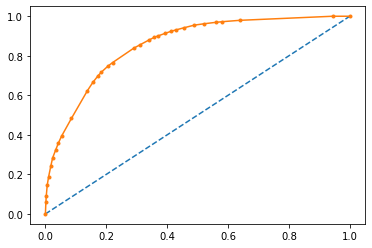

In [151]:
plt.plot([0,1],[0,1], linestyle ='--')
# plot the roc curve for the model
plt.plot(fpr,tpr,marker='.')
# show the plot
plt.show()

In [152]:
probs_test = reg_dt_model.predict_proba(X_test)

In [153]:
probs_test = probs_test[ : ,1]

In [154]:
auc_test = roc_auc_score(test_labels, probs_test)

In [155]:
auc_test

0.7799999999999999

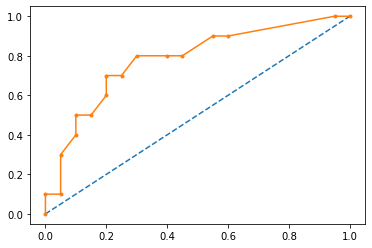

In [157]:
fpr, tpr , thresholds = roc_curve(test_labels,probs_test)
plt.plot([0,1],[0,1], linestyle ='--')
# plot the roc curve for the model
plt.plot(fpr,tpr,marker='.')
# show the plot
plt.show()

In [158]:
from sklearn.metrics import classification_report, confusion_matrix

In [160]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       680
           1       0.66      0.62      0.64       290

    accuracy                           0.79       970
   macro avg       0.75      0.74      0.75       970
weighted avg       0.79      0.79      0.79       970



In [161]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.60      0.60      0.60        10

    accuracy                           0.73        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.73      0.73      0.73        30



In [163]:
confusion_matrix(train_labels, ytrain_predict1)

array([[586,  94],
       [109, 181]], dtype=int64)

In [165]:
confusion_matrix(test_labels, ytest_predict1)

array([[16,  4],
       [ 4,  6]], dtype=int64)

In [166]:
reg_dt_model.score(X_train, train_labels)

0.790721649484536

In [167]:
reg_dt_model.score(X_test, test_labels)

0.7333333333333333